In [1]:
import pandas as pd
data = pd.read_csv('electricity_bill_dataset.csv')
data.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,MotorPump,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,0,10,Hyderabad,Tata Power Company Ltd.,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,0,5,Vadodara,NHPC,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,0,7,Shimla,Jyoti Structure,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,0,6,Mumbai,Power Grid Corp,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,0,2,Mumbai,Ratnagiri Gas and Power Pvt. Ltd. (RGPPL),457,9.2,4204.4


In [2]:
data.shape

(45345, 12)

In [3]:
print(data.isnull().sum())

Fan                0
Refrigerator       0
AirConditioner     0
Television         0
Monitor            0
MotorPump          0
Month              0
City               0
Company            0
MonthlyHours       0
TariffRate         0
ElectricityBill    0
dtype: int64


In [4]:
print(data.max(axis=0)['MotorPump'])
print(data.min(axis=0)['MotorPump'])

0
0


In [5]:
del data['MotorPump']

In [6]:
data.describe()

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,MonthlyHours,TariffRate,ElectricityBill
count,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000,45345.000000
mean,13.990694,21.705458,1.503959,12.502635,2.865057,6.488058,515.083207,8.369648,4311.771307
std,5.470816,1.672575,1.115482,5.756007,3.894933,3.443252,122.618017,0.576992,1073.886406
min,5.000000,17.000000,0.000000,3.000000,1.000000,1.000000,95.000000,7.400000,807.500000
25%,9.000000,22.000000,1.000000,7.000000,1.000000,3.000000,429.000000,7.900000,3556.800000
50%,14.000000,22.000000,2.000000,13.000000,1.000000,6.000000,515.000000,8.400000,4299.400000
75%,19.000000,23.000000,2.000000,17.000000,1.000000,9.000000,601.000000,8.900000,5038.800000
max,23.000000,23.000000,3.000000,22.000000,12.000000,12.000000,926.000000,9.300000,8286.300000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45345 entries, 0 to 45344
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fan              45345 non-null  int64  
 1   Refrigerator     45345 non-null  float64
 2   AirConditioner   45345 non-null  float64
 3   Television       45345 non-null  float64
 4   Monitor          45345 non-null  float64
 5   Month            45345 non-null  int64  
 6   City             45345 non-null  object 
 7   Company          45345 non-null  object 
 8   MonthlyHours     45345 non-null  int64  
 9   TariffRate       45345 non-null  float64
 10  ElectricityBill  45345 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 3.8+ MB


In [8]:
data.City.value_counts()

Hyderabad      2914
Navi Mumbai    2914
Ratnagiri      2892
Faridabad      2891
Gurgaon        2878
Ahmedabad      2868
New Delhi      2848
Mumbai         2846
Chennai        2834
Dahej          2821
Nagpur         2816
Noida          2793
Pune           2788
Shimla         2780
Kolkata        2740
Vadodara       2722
Name: City, dtype: int64

<Figure size 1400x800 with 0 Axes>

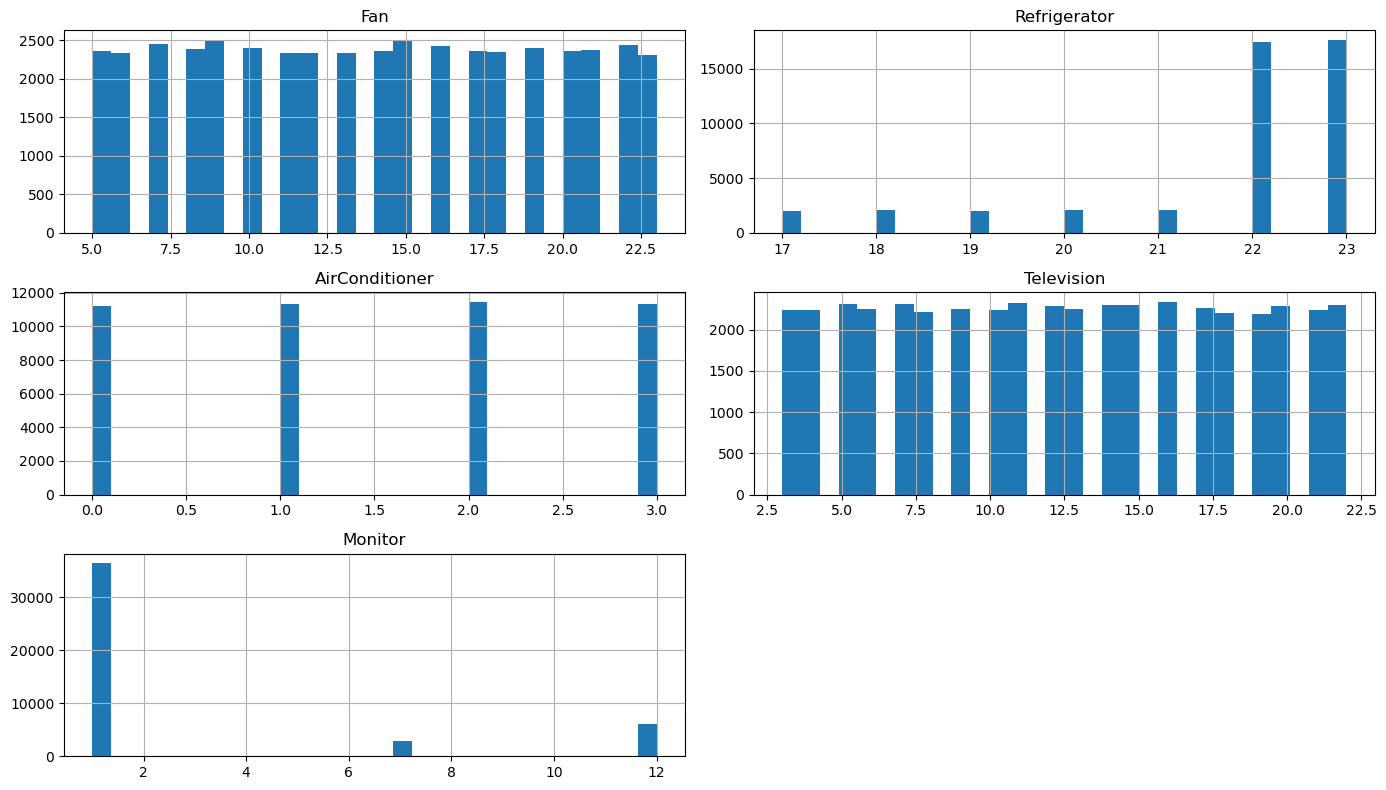

In [9]:
import matplotlib.pyplot as plt
appliance_features = ['Fan', 'Refrigerator', 'AirConditioner', 'Television', 'Monitor']

# Plot distribution for each appliance usage feature
plt.figure(figsize=(14, 8))
data[appliance_features].hist(bins=30, figsize=(14, 8), layout=(3, 2))
plt.tight_layout()
plt.show()

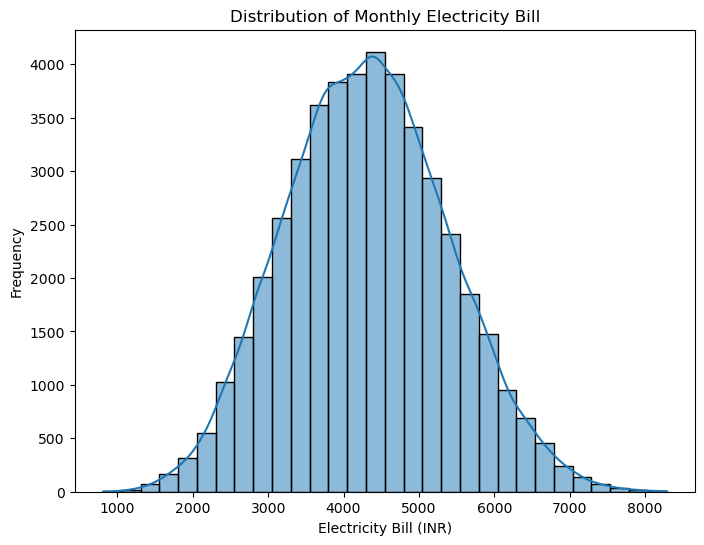

In [10]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(data['ElectricityBill'], bins=30, kde=True)
plt.title('Distribution of Monthly Electricity Bill')
plt.xlabel('Electricity Bill (INR)')
plt.ylabel('Frequency')
plt.show()

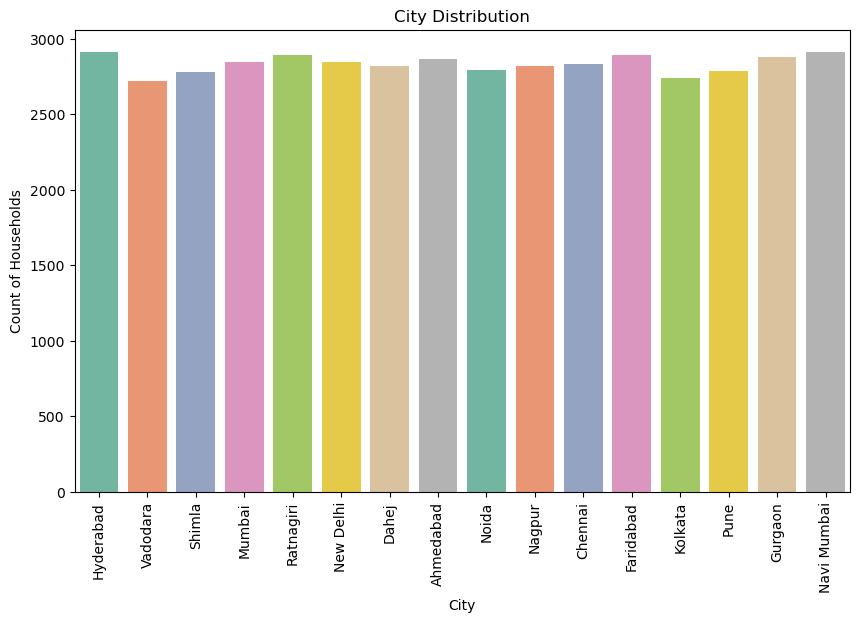

In [11]:
# Bar plot for the city distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='City', palette='Set2')
plt.title('City Distribution')
plt.xlabel('City')
plt.ylabel('Count of Households')
plt.xticks(rotation=90)
plt.show()

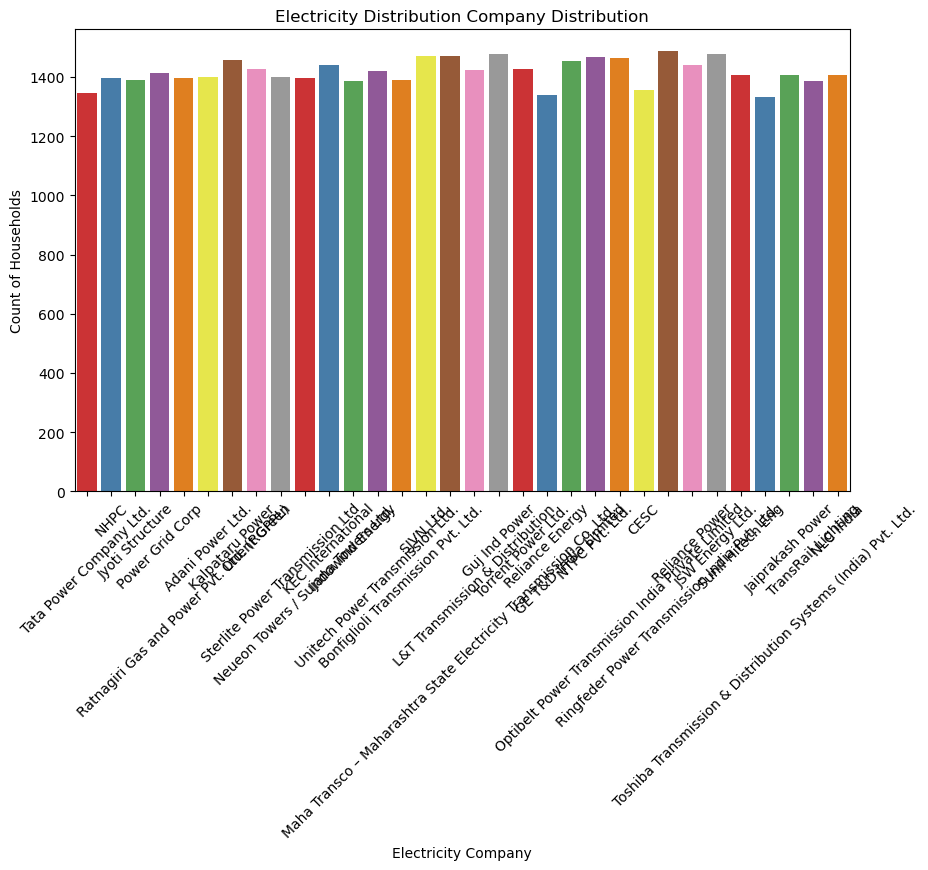

In [12]:
# Bar plot for electricity distribution company
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Company', palette='Set1')
plt.title('Electricity Distribution Company Distribution')
plt.xlabel('Electricity Company')
plt.ylabel('Count of Households')
plt.xticks(rotation=45)
plt.show()

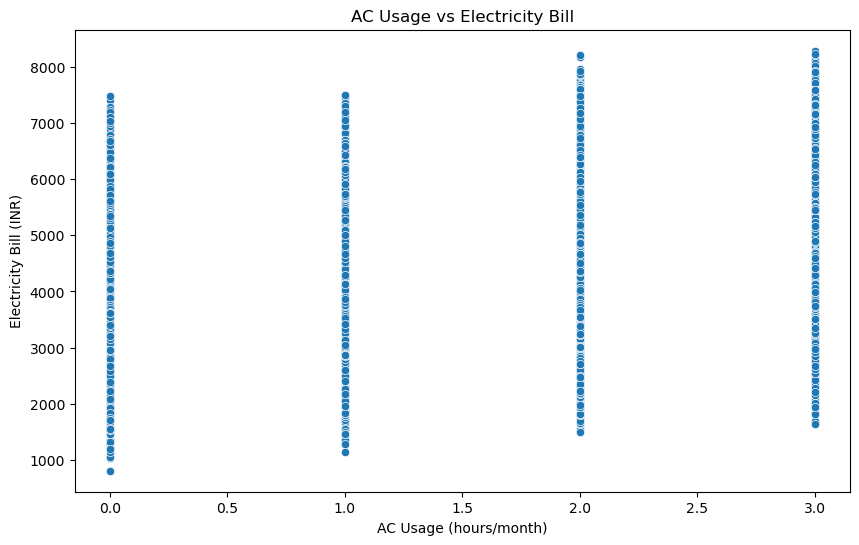

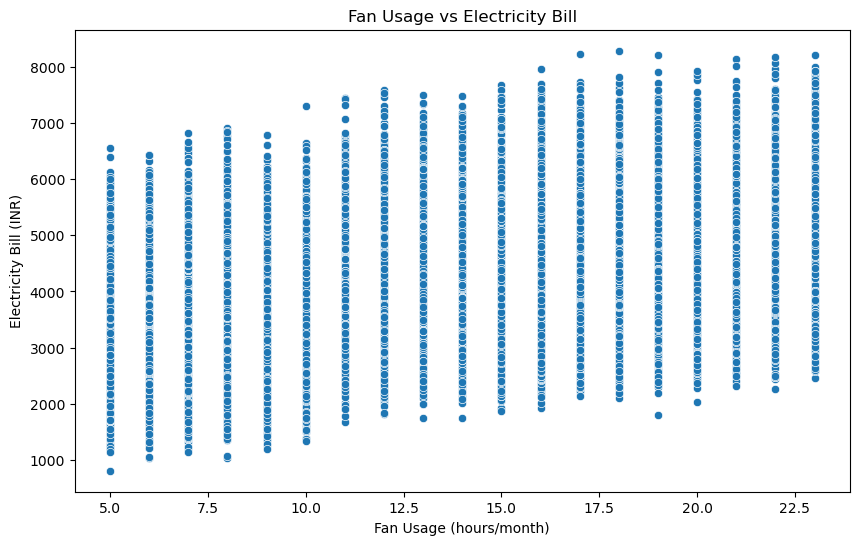

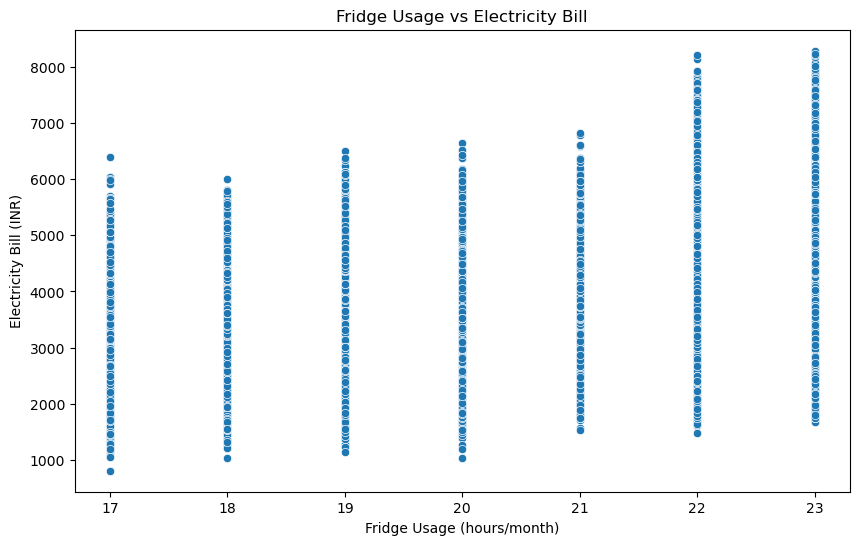

In [13]:
# Scatter plots of appliance usage vs electricity bill
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='AirConditioner', y='ElectricityBill')
plt.title('AC Usage vs Electricity Bill')
plt.xlabel('AC Usage (hours/month)')
plt.ylabel('Electricity Bill (INR)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Fan', y='ElectricityBill')
plt.title('Fan Usage vs Electricity Bill')
plt.xlabel('Fan Usage (hours/month)')
plt.ylabel('Electricity Bill (INR)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Refrigerator', y='ElectricityBill')
plt.title('Fridge Usage vs Electricity Bill')
plt.xlabel('Fridge Usage (hours/month)')
plt.ylabel('Electricity Bill (INR)')
plt.show()

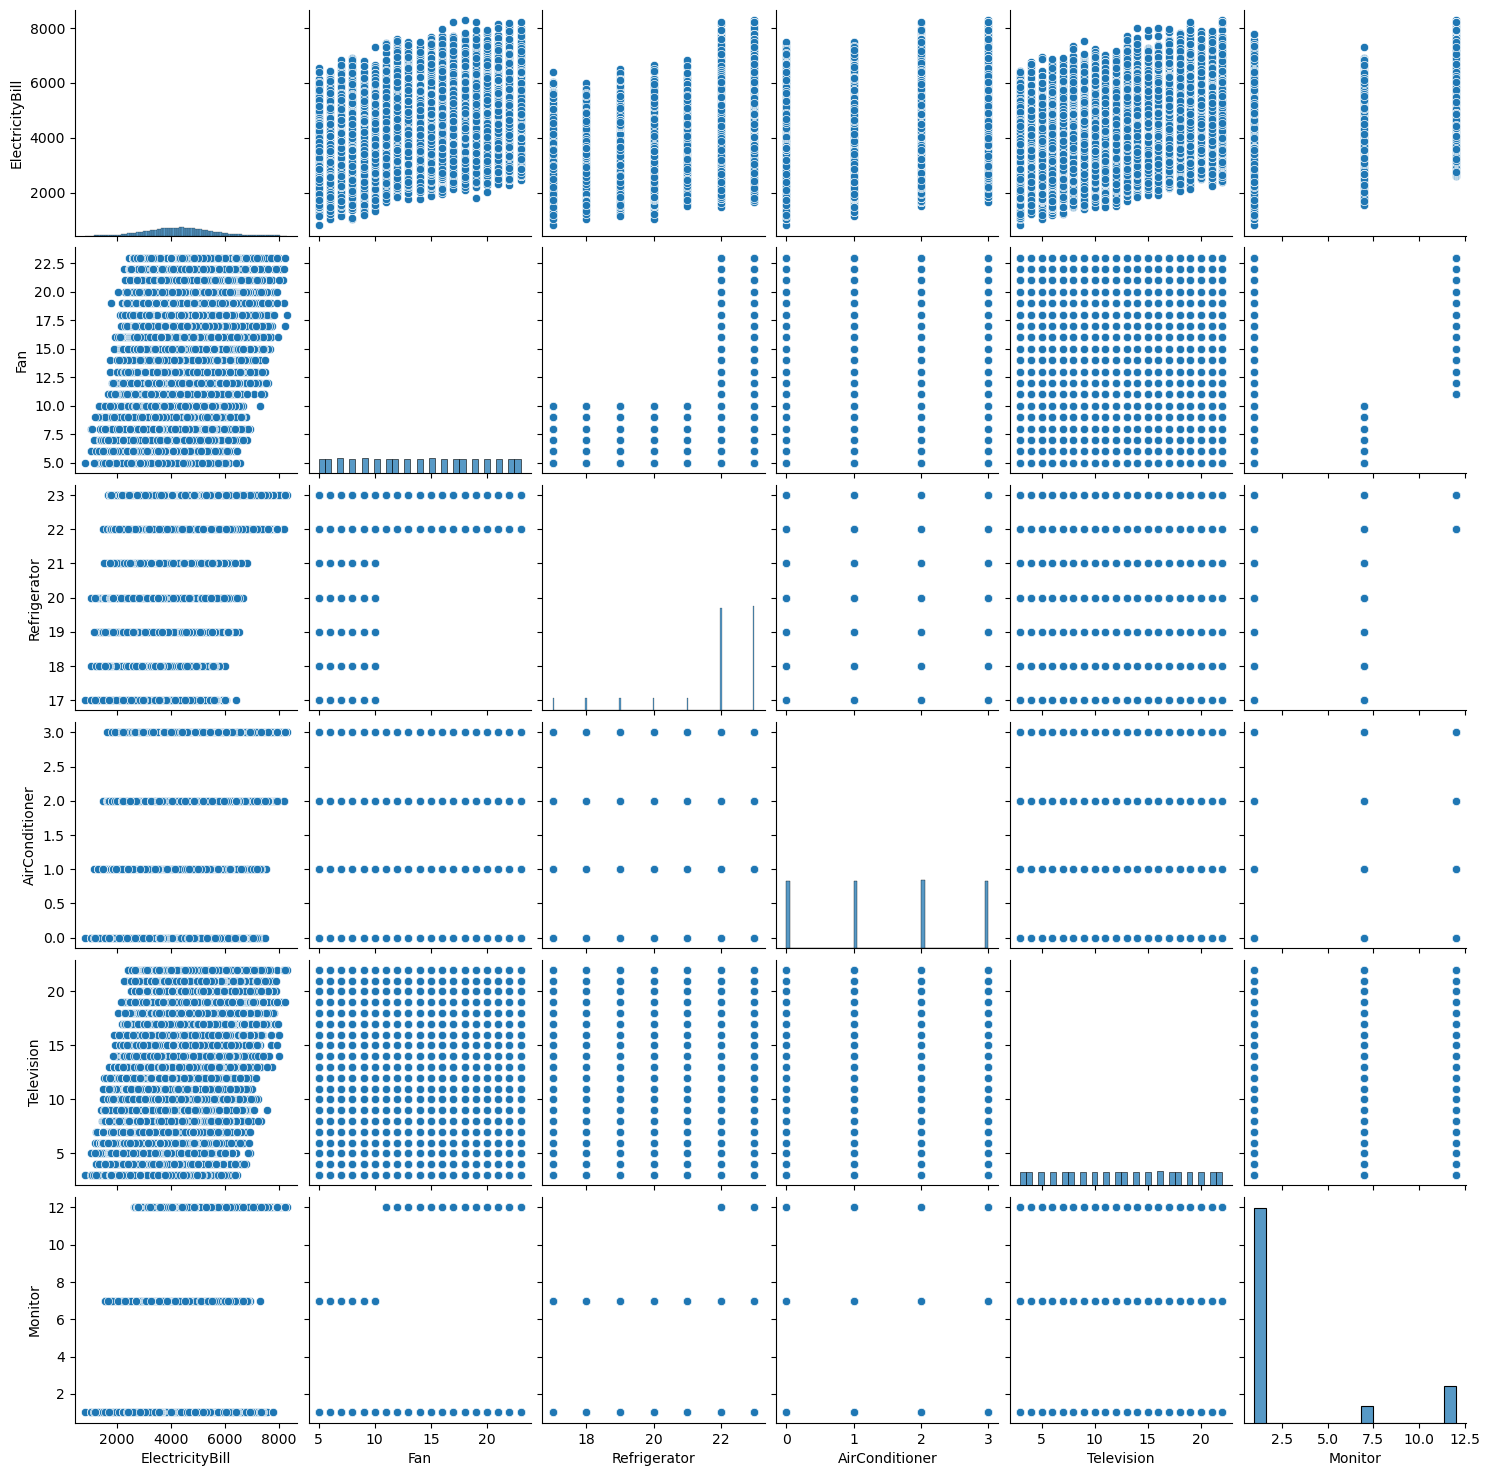

In [14]:
sns.pairplot(data[['ElectricityBill'] + appliance_features])
plt.show()

C:\Users\Shreyas\AppData\Local\Temp\ipykernel_18788\3068015816.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


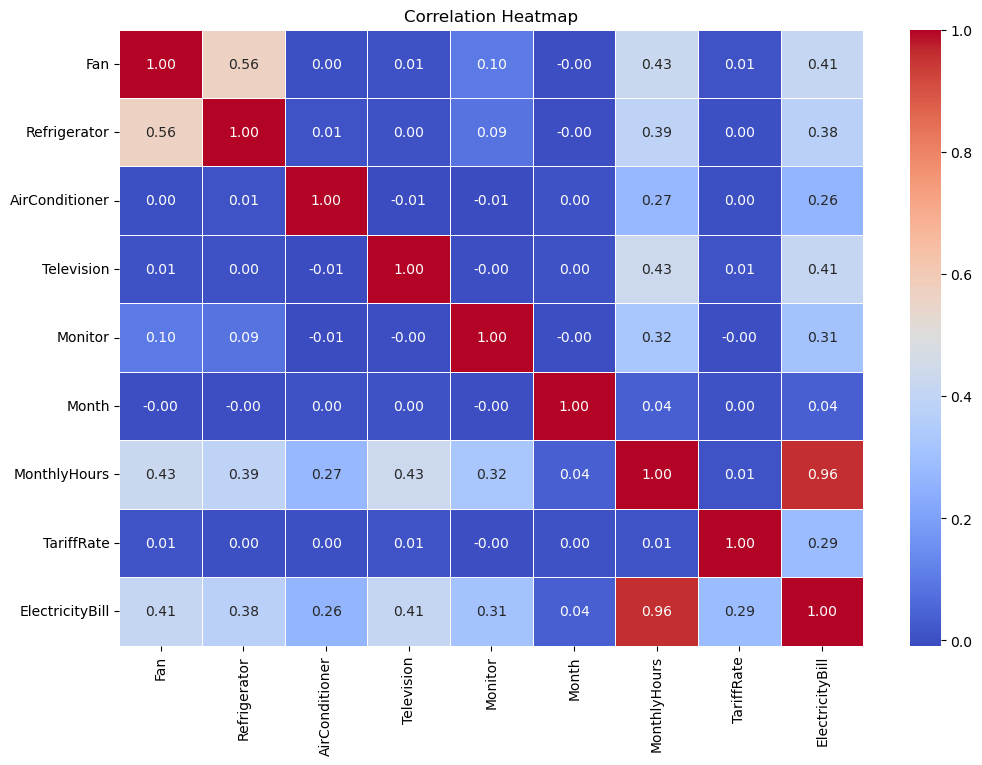

In [15]:
correlation_matrix = data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

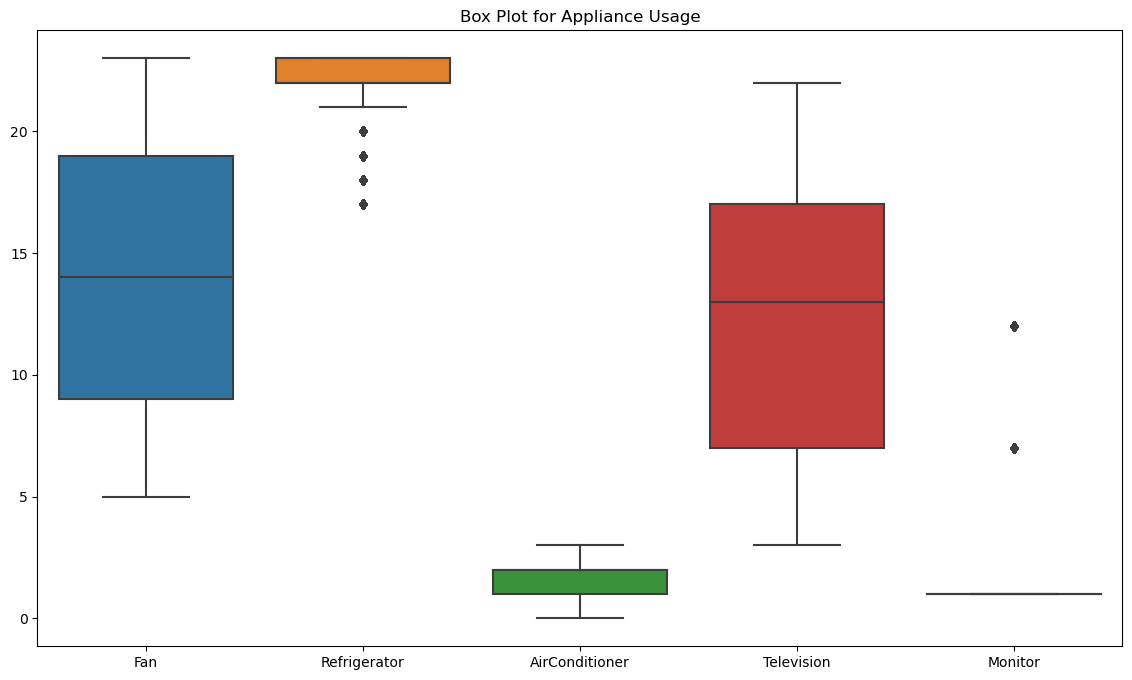

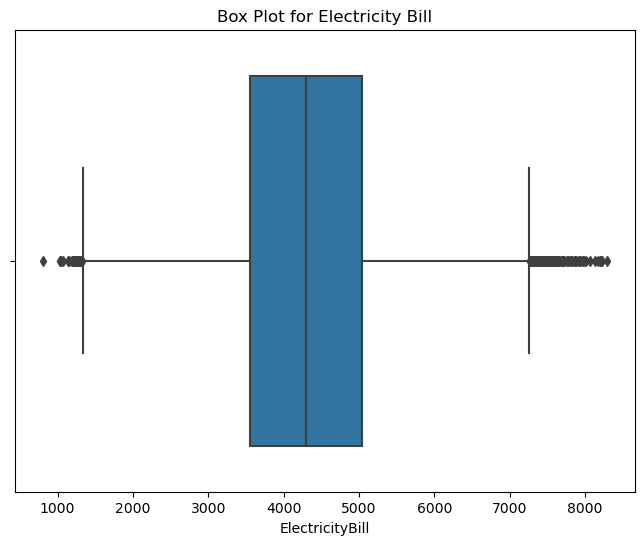

In [16]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=data[appliance_features])
plt.title('Box Plot for Appliance Usage')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='ElectricityBill')
plt.title('Box Plot for Electricity Bill')
plt.show()

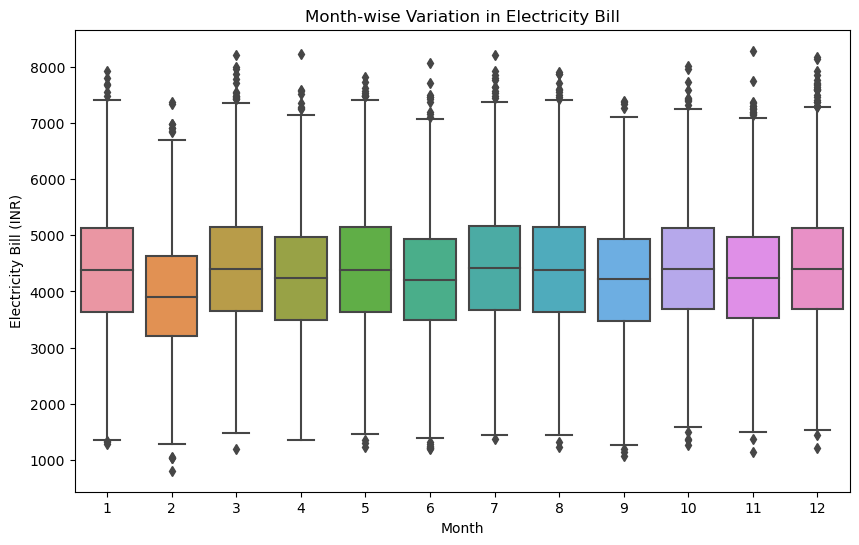

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Month', y='ElectricityBill')
plt.title('Month-wise Variation in Electricity Bill')
plt.xlabel('Month')
plt.ylabel('Electricity Bill (INR)')
plt.show()

C:\Users\Shreyas\AppData\Local\Temp\ipykernel_18788\1666823059.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  appliance_usage['ElectricityBill'] = data['ElectricityBill']


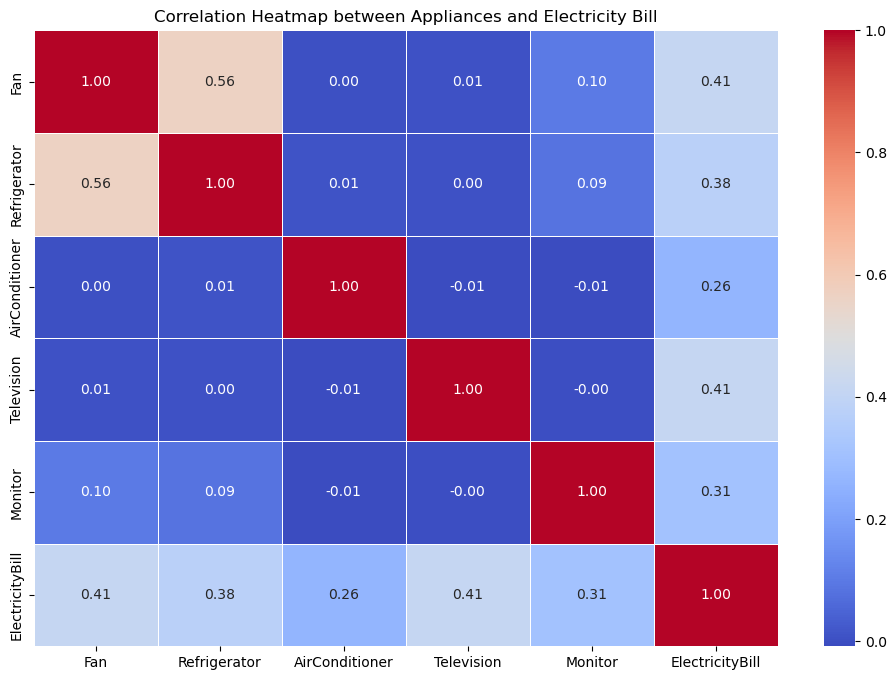

In [18]:
appliance_usage = data[appliance_features]
appliance_usage['ElectricityBill'] = data['ElectricityBill']

plt.figure(figsize=(12, 8))
sns.heatmap(appliance_usage.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap between Appliances and Electricity Bill')
plt.show()

In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['City'] = label_encoder.fit_transform(data['City'])
data['Company'] = label_encoder.fit_transform(data['Company'])
data.head()

,Fan,Refrigerator,AirConditioner,Television,Monitor,Month,City,Company,MonthlyHours,TariffRate,ElectricityBill
0,16,23.0,2.0,6.0,1.0,10,5,27,384,8.4,3225.6
1,19,22.0,2.0,3.0,1.0,5,15,13,488,7.8,3806.4
2,7,20.0,2.0,6.0,7.0,7,14,8,416,7.7,3203.2
3,7,22.0,3.0,21.0,1.0,6,7,19,475,9.2,4370.0
4,11,23.0,2.0,11.0,1.0,2,7,20,457,9.2,4204.4


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data.drop('ElectricityBill', axis=1)
y = data['ElectricityBill']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False)}")
print(f"R²: {r2_score(y_test, y_pred)}")

RMSE: 70.50032531731924
R²: 0.9956378681437016


In [21]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print(f"RMSE: {mean_squared_error(y_test, y_pred_rf, squared=False)}")
print(f"R²: {r2_score(y_test, y_pred_rf)}")

RMSE: 5.192717552347189
R²: 0.9999763350305398


In [22]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
X = data.drop('ElectricityBill', axis=1)
y = data['ElectricityBill']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
import keras
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error',metrics=[keras.metrics.MeanAbsolutePercentageError()])

In [40]:
# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=2,shuffle = True)

Epoch 1/100
907/907 - 2s - loss: 10899930.0000 - mean_absolute_percentage_error: 69.0716 - val_loss: 902747.4375 - val_mean_absolute_percentage_error: 20.0101 - 2s/epoch - 2ms/step
Epoch 2/100
907/907 - 1s - loss: 361654.2500 - mean_absolute_percentage_error: 12.1009 - val_loss: 171782.1250 - val_mean_absolute_percentage_error: 8.6126 - 956ms/epoch - 1ms/step
Epoch 3/100
907/907 - 1s - loss: 132104.5312 - mean_absolute_percentage_error: 7.5447 - val_loss: 96910.0156 - val_mean_absolute_percentage_error: 6.4961 - 995ms/epoch - 1ms/step
Epoch 4/100
907/907 - 1s - loss: 80541.8750 - mean_absolute_percentage_error: 5.8902 - val_loss: 63118.5000 - val_mean_absolute_percentage_error: 5.2225 - 933ms/epoch - 1ms/step
Epoch 5/100
907/907 - 1s - loss: 52393.3633 - mean_absolute_percentage_error: 4.7524 - val_loss: 41085.1484 - val_mean_absolute_percentage_error: 4.2203 - 995ms/epoch - 1ms/step
Epoch 6/100
907/907 - 1s - loss: 33291.4766 - mean_absolute_percentage_error: 3.7894 - val_loss: 25800.

907/907 - 1s - loss: 30.7303 - mean_absolute_percentage_error: 0.1050 - val_loss: 36.3033 - val_mean_absolute_percentage_error: 0.1154 - 903ms/epoch - 995us/step
Epoch 49/100
907/907 - 1s - loss: 29.6607 - mean_absolute_percentage_error: 0.1034 - val_loss: 28.1752 - val_mean_absolute_percentage_error: 0.0980 - 908ms/epoch - 1ms/step
Epoch 50/100
907/907 - 1s - loss: 29.5052 - mean_absolute_percentage_error: 0.1037 - val_loss: 32.3632 - val_mean_absolute_percentage_error: 0.1099 - 905ms/epoch - 998us/step
Epoch 51/100
907/907 - 1s - loss: 28.6336 - mean_absolute_percentage_error: 0.1022 - val_loss: 30.7058 - val_mean_absolute_percentage_error: 0.1053 - 1s/epoch - 1ms/step
Epoch 52/100
907/907 - 1s - loss: 29.8850 - mean_absolute_percentage_error: 0.1042 - val_loss: 27.6412 - val_mean_absolute_percentage_error: 0.1045 - 918ms/epoch - 1ms/step
Epoch 53/100
907/907 - 1s - loss: 28.2758 - mean_absolute_percentage_error: 0.1016 - val_loss: 26.1799 - val_mean_absolute_percentage_error: 0.0963

Epoch 96/100
907/907 - 1s - loss: 17.6926 - mean_absolute_percentage_error: 0.0796 - val_loss: 18.8940 - val_mean_absolute_percentage_error: 0.0827 - 918ms/epoch - 1ms/step
Epoch 97/100
907/907 - 1s - loss: 17.4333 - mean_absolute_percentage_error: 0.0786 - val_loss: 14.9938 - val_mean_absolute_percentage_error: 0.0695 - 985ms/epoch - 1ms/step
Epoch 98/100
907/907 - 1s - loss: 17.4818 - mean_absolute_percentage_error: 0.0791 - val_loss: 16.8447 - val_mean_absolute_percentage_error: 0.0766 - 993ms/epoch - 1ms/step
Epoch 99/100
907/907 - 1s - loss: 18.5488 - mean_absolute_percentage_error: 0.0815 - val_loss: 15.1592 - val_mean_absolute_percentage_error: 0.0721 - 972ms/epoch - 1ms/step
Epoch 100/100
907/907 - 1s - loss: 17.6634 - mean_absolute_percentage_error: 0.0786 - val_loss: 19.7496 - val_mean_absolute_percentage_error: 0.0842 - 972ms/epoch - 1ms/step


In [41]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping], verbose=1)

Epoch 1/100
907/907 [==============================] - 1s 1ms/step - loss: 17.2693 - mean_absolute_percentage_error: 0.0785 - val_loss: 15.7087 - val_mean_absolute_percentage_error: 0.0731
Epoch 2/100
907/907 [==============================] - 1s 1ms/step - loss: 17.2641 - mean_absolute_percentage_error: 0.0781 - val_loss: 23.0043 - val_mean_absolute_percentage_error: 0.0887
Epoch 3/100
907/907 [==============================] - 1s 1ms/step - loss: 18.1883 - mean_absolute_percentage_error: 0.0800 - val_loss: 25.0717 - val_mean_absolute_percentage_error: 0.0962
Epoch 4/100
907/907 [==============================] - 1s 1ms/step - loss: 16.6940 - mean_absolute_percentage_error: 0.0767 - val_loss: 15.1743 - val_mean_absolute_percentage_error: 0.0706
Epoch 5/100
907/907 [==============================] - 1s 1ms/step - loss: 18.3800 - mean_absolute_percentage_error: 0.0804 - val_loss: 20.6220 - val_mean_absolute_percentage_error: 0.0867
Epoch 6/100
907/907 [==============================] - 

In [42]:
test_loss = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss (MSE): {test_loss}")

y_pred = model.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

Test Loss (MSE): [12.279781341552734, 0.06263279914855957]
284/284 [==============================] - 0s 843us/step
RMSE: 3.5042503536533722
R^2: 0.9999892227787505


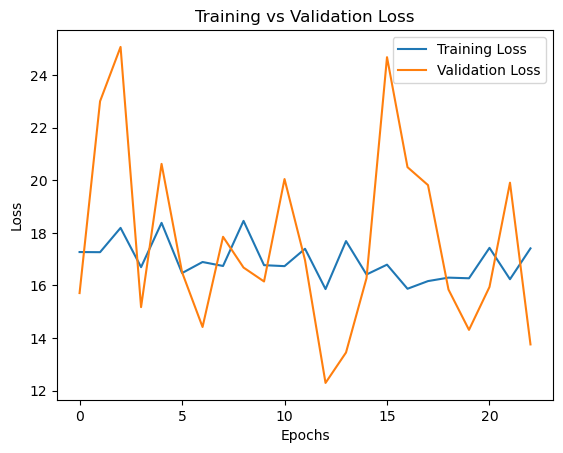

In [43]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

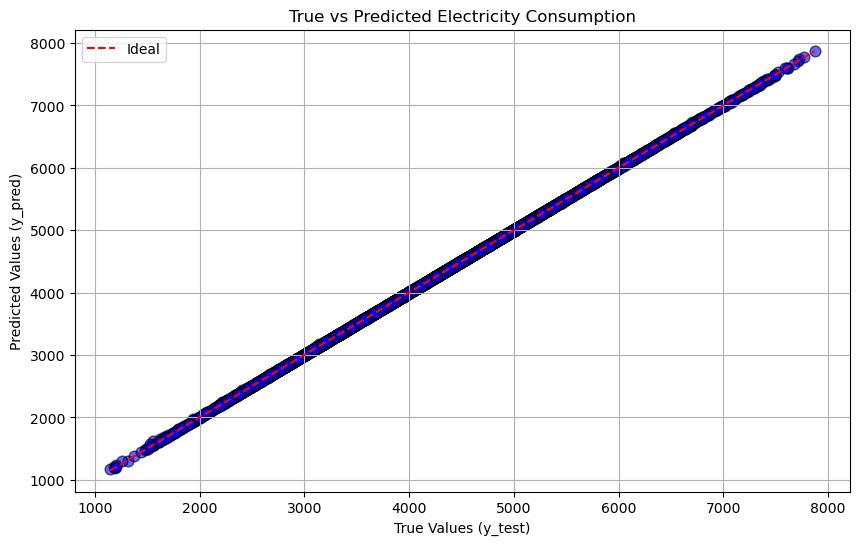

In [47]:
y_test_flat = y_test.values.flatten()
y_pred_flat = y_pred.flatten()

plt.figure(figsize=(10, 6))
plt.scatter(y_test_flat, y_pred_flat, color='blue', alpha=0.6, edgecolors='k', s=60)

plt.plot([min(y_test_flat), max(y_test_flat)], [min(y_test_flat), max(y_test_flat)], color='red', linestyle='--', label="Ideal")

plt.xlabel('True Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.title('True vs Predicted Electricity Consumption')
plt.legend()
plt.grid(True)

plt.show()

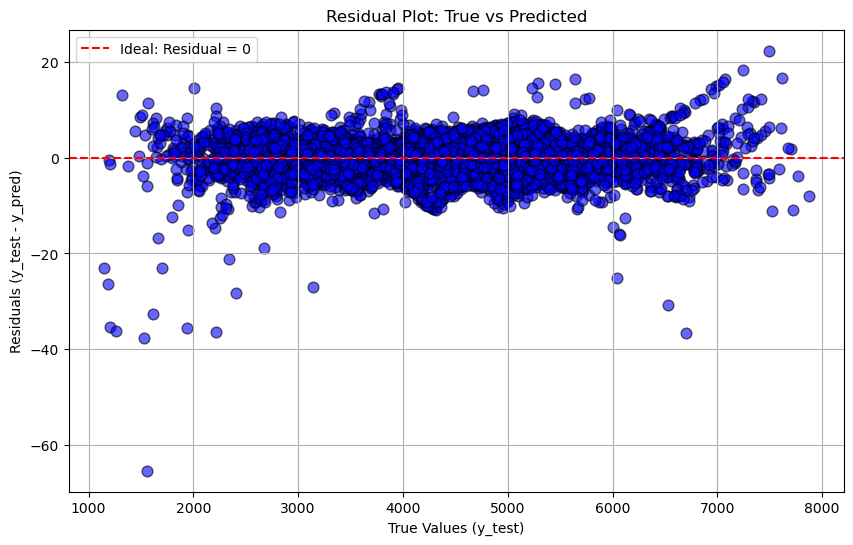

In [48]:
residuals = y_test_flat - y_pred_flat

plt.figure(figsize=(10, 6))
plt.scatter(y_test_flat, residuals, color='blue', alpha=0.6, edgecolors='k', s=60)

plt.axhline(0, color='red', linestyle='--', label="Ideal: Residual = 0")
plt.xlabel('True Values (y_test)')
plt.ylabel('Residuals (y_test - y_pred)')
plt.title('Residual Plot: True vs Predicted')
plt.legend()
plt.grid(True)

plt.show()

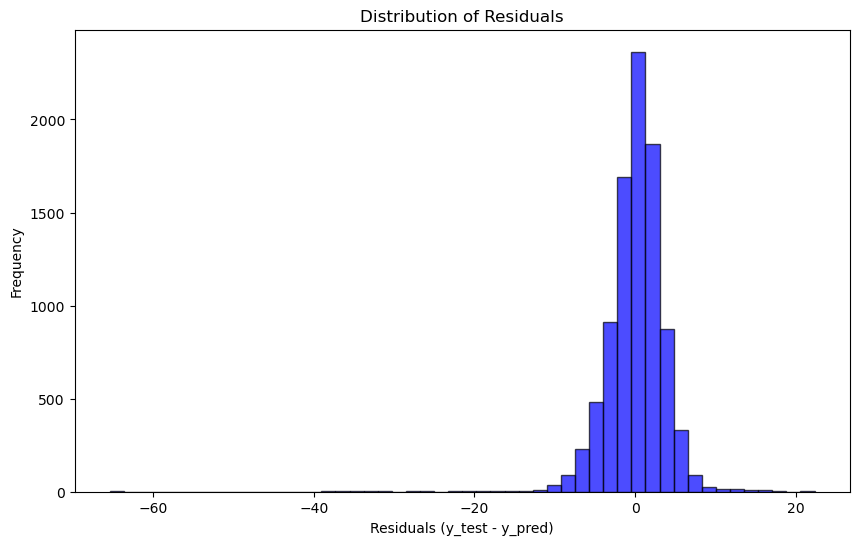

In [49]:
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, color='blue', alpha=0.7, edgecolor='k')

plt.xlabel('Residuals (y_test - y_pred)')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')

plt.show()